# NYC CENSUS DATA 2010 - 2020

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
census_2020 = pd.read_csv('Resources/census_2020.csv')
census_2010 = pd.read_csv('Resources/census_2010.csv')

# Cleaning Census 2010

In [3]:
# Create a dictionary to map old column names to new column names
new_column_names = {'Label (Grouping)': 'Age Groups', 
                    'Bronx borough, Bronx County, New York!!Total!!Estimate': 'Bronx borough 2010',
                    'Brooklyn borough, Kings County, New York!!Total!!Estimate': 'Brooklyn borough 2010',
                    'Manhattan borough, New York County, New York!!Total!!Estimate' : 'Manhattan borough 2010',
                    'Queens borough, Queens County, New York!!Total!!Estimate' : 'Queens borough 2010',
                    'Staten Island borough, Richmond County, New York!!Total!!Estimate' : 'Staten Island borough 2010'
                   }

# Rename all columns using the dictionary
census_2010 = census_2010.rename(columns=new_column_names)
census_2010 = census_2010.dropna()
census_2010 = census_2010.drop(census_2010.index[19:])
census_2010.drop(0,inplace=True) 


total_population_bronx = 1365725
total_population_brooklyn = 2466782
total_population_manhathan = 1583345
total_population_queens = 2199169
total_population_stanten_island = 463450

census_2010['Bronx borough 2010'] = census_2010['Bronx borough 2010'].astype(str).str.rstrip('%').astype(float) / 100
census_2010['Bronx Population 2010'] = (census_2010['Bronx borough 2010'] * total_population_bronx).astype(int)

census_2010['Brooklyn borough 2010'] = census_2010['Brooklyn borough 2010'].astype(str).str.rstrip('%').astype(float) / 100
census_2010['Brooklyn Population 2010'] = (census_2010['Brooklyn borough 2010'] * total_population_brooklyn).astype(int)

census_2010['Manhattan borough 2010'] = census_2010['Manhattan borough 2010'].astype(str).str.rstrip('%').astype(float) / 100
census_2010['Manhattan Population 2010'] = (census_2010['Manhattan borough 2010'] * total_population_manhathan).astype(int)

census_2010['Queens borough 2010'] = census_2010['Queens borough 2010'].astype(str).str.rstrip('%').astype(float) / 100
census_2010['Queens Population 2010'] = (census_2010['Queens borough 2010'] * total_population_queens).astype(int)

census_2010['Staten Island borough 2010'] = census_2010['Staten Island borough 2010'].astype(str).str.rstrip('%').astype(float) / 100
census_2010['Staten Island Population 2010'] = (census_2010['Staten Island borough 2010'] * total_population_stanten_island).astype(int)

census_2010 = census_2010.drop(columns=census_2010.columns[1:6])

census_2010["Year"] = 2010
census_2010.columns = [col.replace(' 2010', '') for col in census_2010.columns]

# Cleaning census 2020

In [4]:
# Create a dictionary to map old column names to new column names
new_column_names = {'Label (Grouping)': 'Age Groups', 
                    'Bronx borough, Bronx County, New York!!Total!!Estimate': 'Bronx Population 2020',
                    'Brooklyn borough, Kings County, New York!!Total!!Estimate': 'Brooklyn Population 2020',
                    'Manhattan borough, New York County, New York!!Total!!Estimate' : 'Manhattan Population 2020',
                    'Queens borough, Queens County, New York!!Total!!Estimate' : 'Queens Population 2020',
                    'Staten Island borough, Richmond County, New York!!Total!!Estimate' : 'Staten Island Population 2020'
                   }

# Rename all columns using the dictionary
census_2020 = census_2020.rename(columns=new_column_names)
census_2020 = census_2020.drop(census_2020.index[19:])
census_2020 = census_2020.dropna()
census_2020.drop(0,inplace=True) 

for col in census_2020.columns[1:]:
    census_2020[col] = census_2020[col].astype(str).str.replace(',', '').astype(int)

census_2020["Year"] = 2020
census_2020.columns = [col.replace(' 2020', '') for col in census_2020.columns]

# NEW DATASET 

In [5]:
census_2010_2020 = pd.concat([census_2010, census_2020])
census_2010_2020

,Age Groups,Bronx Population,Brooklyn Population,Manhattan Population,Queens Population,Staten Island Population,Year
2,Under 5 years,103795,175141,79167,131950,28270,2010
3,5 to 9 years,99697,157874,61750,118755,29660,2010
4,10 to 14 years,102429,157874,60167,125352,31514,2010
5,15 to 19 years,114720,172674,79167,138547,32904,2010
6,20 to 24 years,107892,189942,136167,156140,30124,2010
7,25 to 29 years,105160,219543,183668,184730,30124,2010
8,30 to 34 years,95600,192408,155167,171535,29660,2010
9,35 to 39 years,91503,172674,128250,167136,32441,2010
10,40 to 44 years,99697,170207,114000,164937,35685,2010
11,45 to 49 years,95600,165274,104500,164937,36612,2010


# GRAPHS

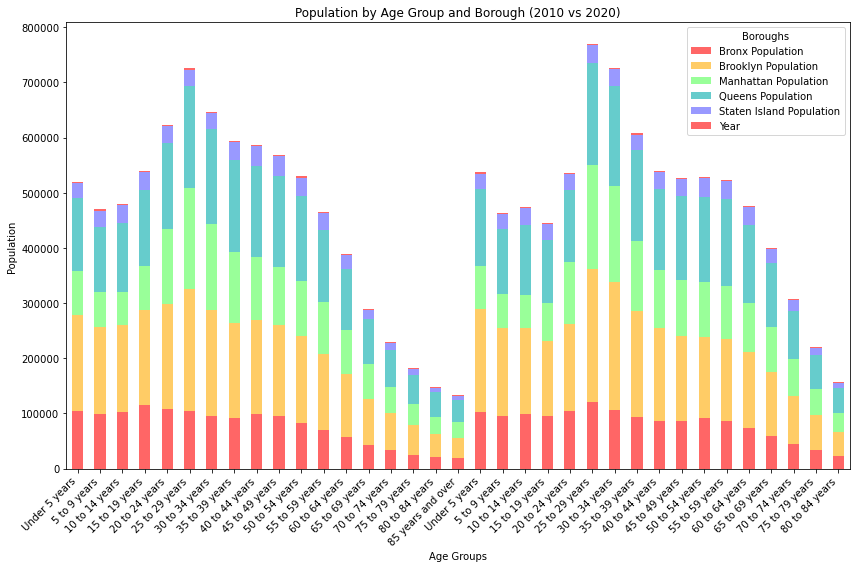

In [6]:
census_2010_2020.set_index('Age Groups', inplace=True)
pastel_colors = ['#FF6666', '#FFCC66', '#99FF99', '#66CCCC', '#9999FF']
census_2010_2020.plot(kind='bar', stacked=True, figsize=(12, 8),color=pastel_colors)
plt.title('Population by Age Group and Borough (2010 vs 2020)')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Boroughs')
plt.savefig('population_in_nyc_2010_vs_2020.png')
plt.tight_layout()
plt.show()

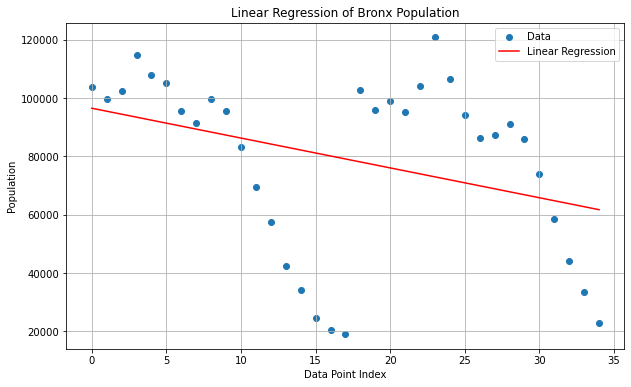

Slope: -1023.059943977591
Intercept: 96515.9619047619
R-squared: 0.11872239524875607


In [21]:
x = range(len(census_2010_2020))  # Use index as x values
y = census_2010_2020['Bronx Population'].values  # Choose one borough for example
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')
plt.title('Linear Regression of Bronx Population')
plt.xlabel('Data Point Index')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('linear_regresion_bronx.png')
plt.show()

# Print the slope, intercept, and coefficient of determination (r-squared)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

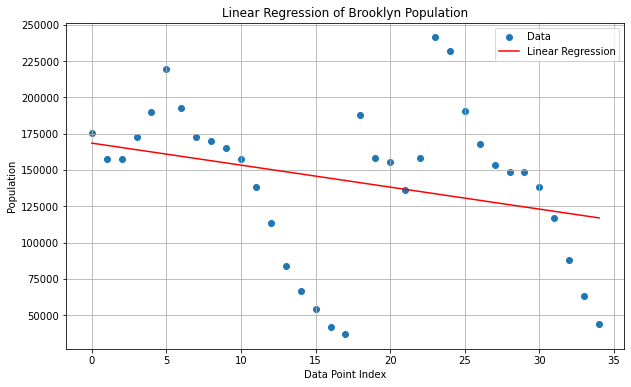

Slope: -1515.1330532212887
Intercept: 168461.31904761906
R-squared: 0.08368400918784717


In [17]:
x = range(len(census_2010_2020))  # Use index as x values
y = census_2010_2020['Brooklyn Population'].values  # Choose one borough for example
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')
plt.title('Linear Regression of Brooklyn Population')
plt.xlabel('Data Point Index')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('linear_regresion_brooklyn.png')
plt.show()

# Print the slope, intercept, and coefficient of determination (r-squared)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

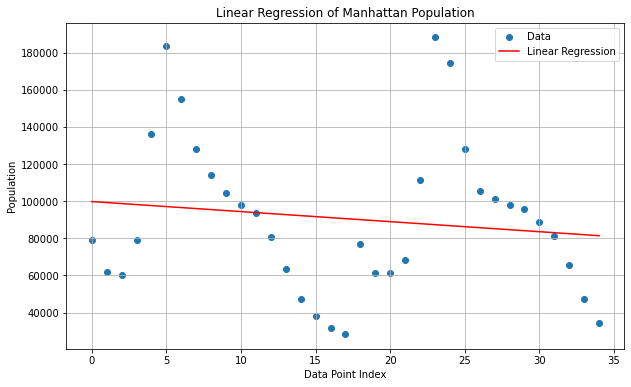

Slope: -541.0350140056022
Intercept: 99788.42380952381
R-squared: 0.01775173017925929


In [18]:
x = range(len(census_2010_2020))  # Use index as x values
y = census_2010_2020['Manhattan Population'].values  # Choose one borough for example
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')
plt.title('Linear Regression of Manhattan Population')
plt.xlabel('Data Point Index')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('linear_regresion_Manhattan.png')
plt.show()

# Print the slope, intercept, and coefficient of determination (r-squared)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

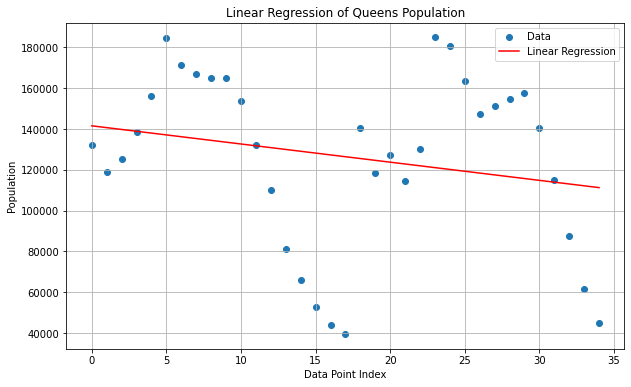

Slope: -890.2226890756301
Intercept: 141538.7
R-squared: 0.0461395618806733


In [19]:
x = range(len(census_2010_2020))  # Use index as x values
y = census_2010_2020['Queens Population'].values  # Choose one borough for example
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')
plt.title('Linear Regression of Queens Population')
plt.xlabel('Data Point Index')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('linear_regresion_Queens.png')
plt.show()

# Print the slope, intercept, and coefficient of determination (r-squared)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

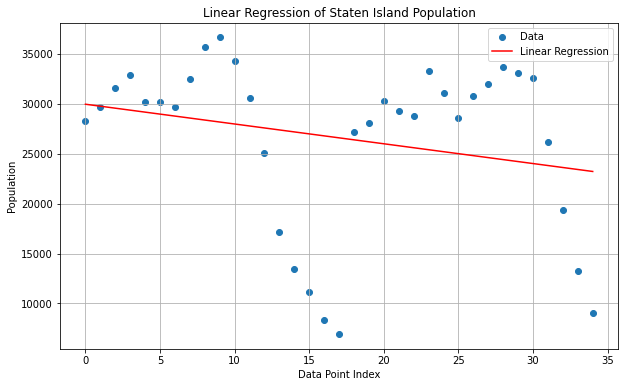

Slope: -197.84005602240896
Intercept: 29934.05238095238
R-squared: 0.0574127753255582


In [20]:
x = range(len(census_2010_2020))  # Use index as x values
y = census_2010_2020['Staten Island Population'].values  # Choose one borough for example
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')
plt.title('Linear Regression of Staten Island Population')
plt.xlabel('Data Point Index')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('linear_regresion_Staten_Island.png')
plt.show()

# Print the slope, intercept, and coefficient of determination (r-squared)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")